### Exploratory Data Analysis (EDA) for Support Tickets

In [ ]:
#Imprt cleaned data from data_preprocessing module
import pandas as pd
df = pd.read_csv('data\lemmatized_tickets.csv')


KeyError: 'Topic_Label'

In [12]:
#Display basic info and first few rows
print("Dataset shape:", df.shape)
print("Columns:", df.columns)
print(df.dtypes)
print(df.describe(include='all'))
df['clean_description']

Dataset shape: (2769, 19)
Columns: Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating', 'clean_description',
       'lemmatized_description'],
      dtype='object')
Ticket ID                         int64
Customer Name                    object
Customer Email                   object
Customer Age                      int64
Customer Gender                  object
Product Purchased                object
Date of Purchase                 object
Ticket Type                      object
Ticket Subject                   object
Ticket Description               object
Ticket Status                    object
Resolution                       object
Ticket Priority                  object
Ti

0       turning working fine yesterday doesnt respond ...
1       youre interested id love see happen check feed...
2       note seller responsible damages arising delive...
3       search whats new report feedback customer serv...
4       cannot type text name identify someone like mr...
                              ...                        
2764    – – contacted customer support remains unresolved
2765    unable establish stable internet connection ke...
2766    set fails connect available networks steps tak...
2767    using different browser one factory reset hopi...
2768    dont think category wouldnt case occurs consis...
Name: clean_description, Length: 2769, dtype: object

The dataset has 2,769 support tickets with 19 columns. Key fields for analysis include:

**Ticket Type, Ticket Subject, and Ticket Description** – Useful for categorization.

**Ticket Status and Priority** – Helps with automation strategies.

**Resolution and Customer Satisfaction Rating** – Useful for problem-solving insights.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import Counter
from wordcloud import WordCloud
from nltk.util import ngrams
from nltk.corpus import stopwords

In [3]:
# Ensure NLTK resources are available
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mocho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mocho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mocho\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


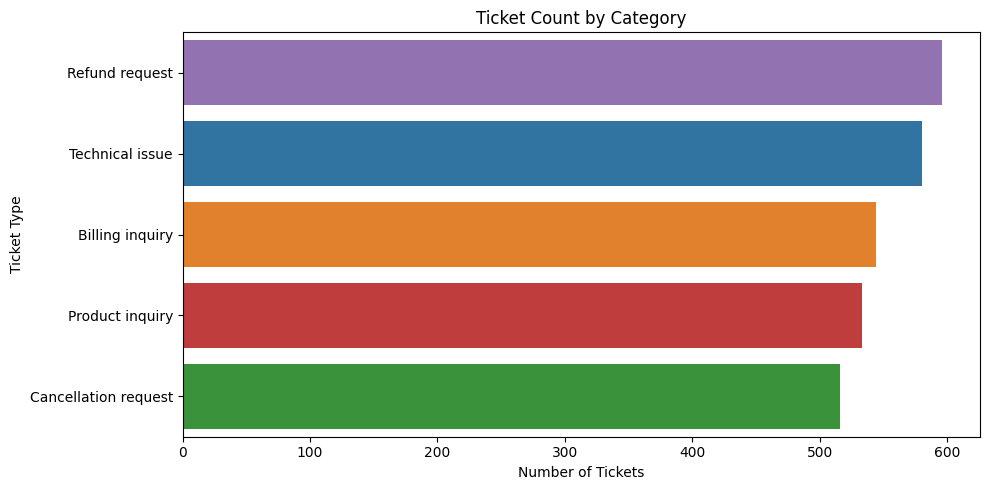

In [4]:
# Ticket count by category
plt.figure(figsize=(10, 5))
sns.countplot(y='Ticket Type', data=df, hue='Ticket Type', order=df['Ticket Type'].value_counts().index)
plt.title("Ticket Count by Category")
plt.xlabel("Number of Tickets")
plt.ylabel("Ticket Type")
plt.tight_layout()
plt.show()

In [5]:
# POS Tagging on full text
tokens = nltk.word_tokenize(" ".join(df['clean_description'].dropna()))
pos_tags = nltk.pos_tag(tokens)
pos_counts = Counter(tag for word, tag in pos_tags)

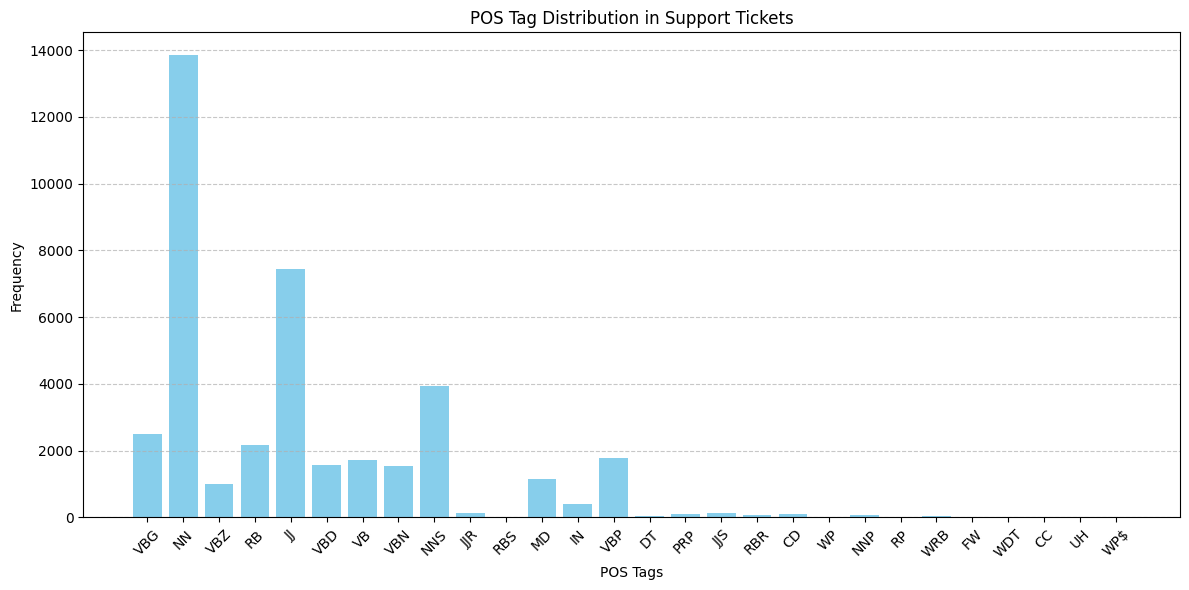

In [6]:
# POS Tag distribution
plt.figure(figsize=(12, 6))
plt.bar(pos_counts.keys(), pos_counts.values(), color='skyblue')
plt.title('POS Tag Distribution in Support Tickets')
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [7]:
# N-Gram Analysis
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

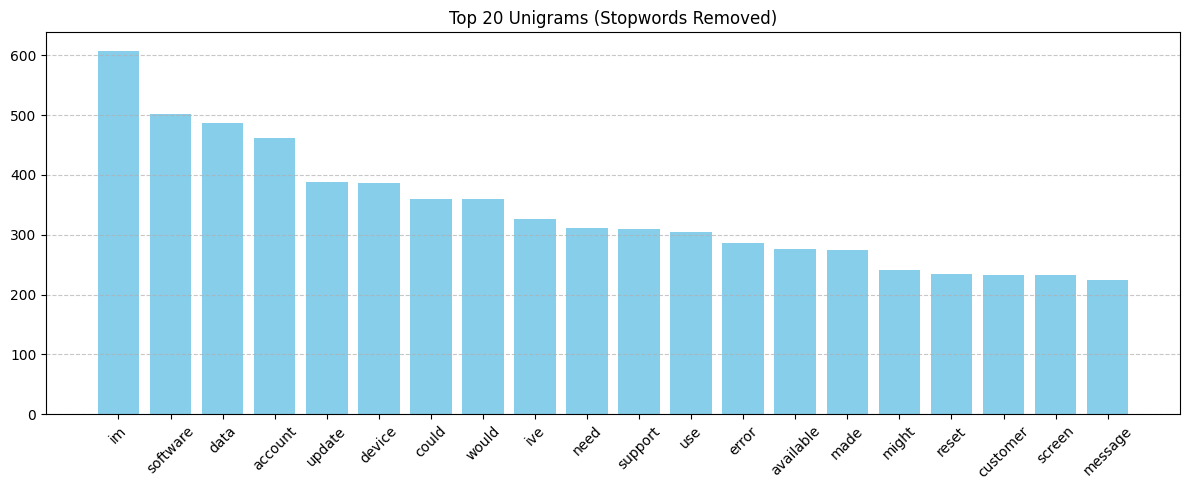

In [8]:
# Unigrams
unigram_counts = Counter(filtered_tokens)
plt.figure(figsize=(12, 5))
plt.bar(*zip(*unigram_counts.most_common(20)), color='skyblue')
plt.title('Top 20 Unigrams (Stopwords Removed)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

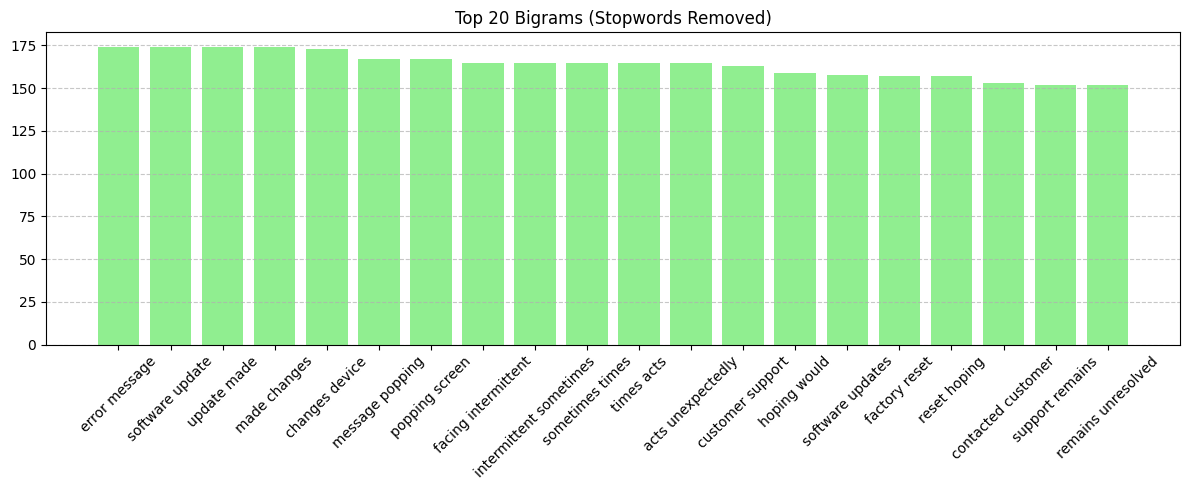

In [9]:
# Bigrams
bigram_counts = Counter(ngrams(filtered_tokens, 2))
plt.figure(figsize=(12, 5))
plt.bar([" ".join(bi) for bi, _ in bigram_counts.most_common(20)], [count for _, count in bigram_counts.most_common(20)], color='lightgreen')
plt.title('Top 20 Bigrams (Stopwords Removed)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

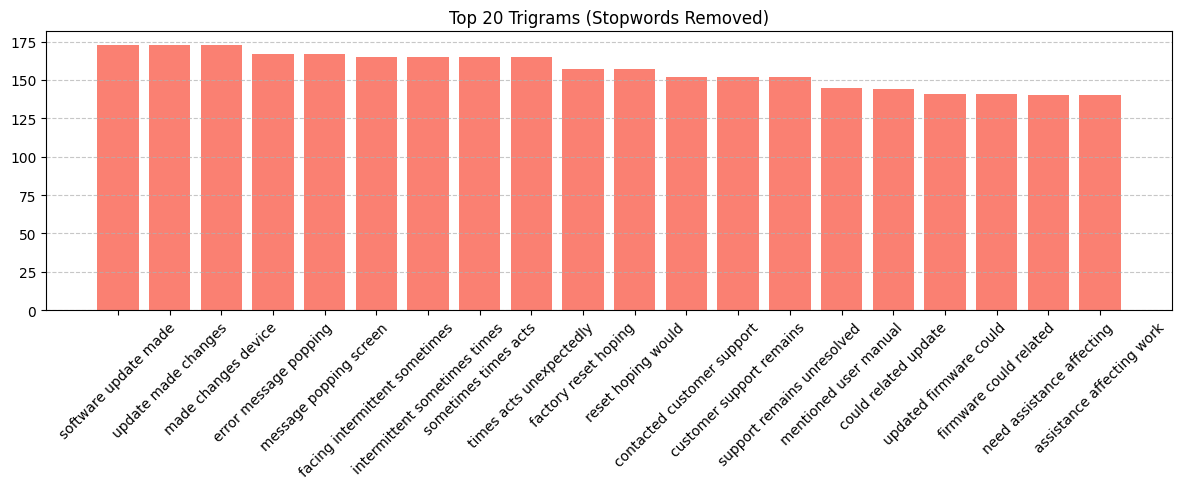

In [10]:
# Trigrams
trigram_counts = Counter(ngrams(filtered_tokens, 3))
plt.figure(figsize=(12, 5))
plt.bar([" ".join(tri) for tri, _ in trigram_counts.most_common(20)], [count for _, count in trigram_counts.most_common(20)], color='salmon')
plt.title('Top 20 Trigrams (Stopwords Removed)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

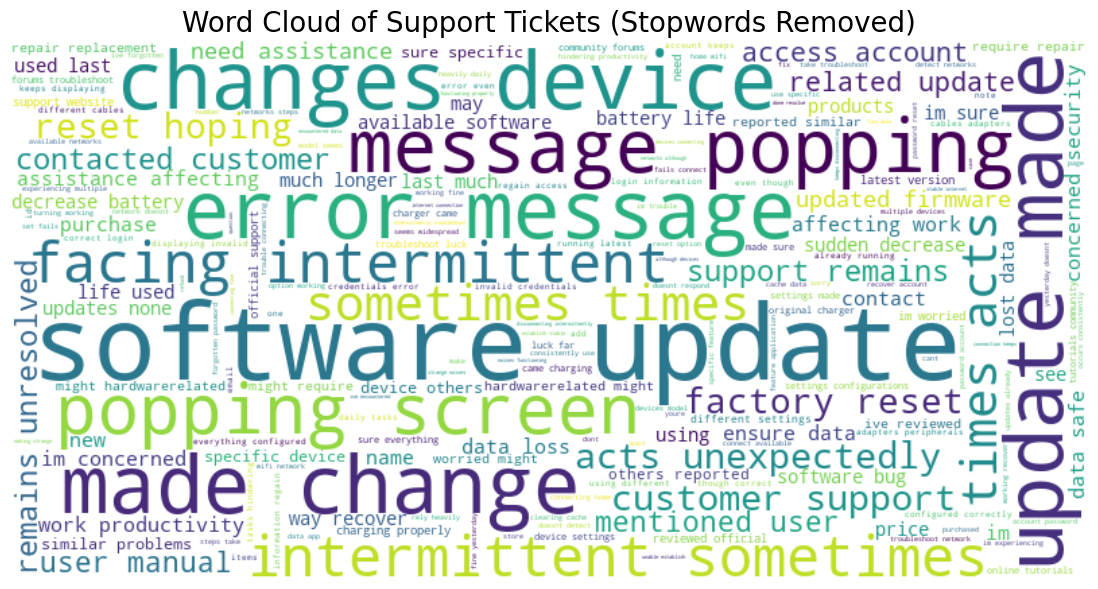

In [11]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(filtered_tokens))
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Support Tickets (Stopwords Removed)', fontsize=20)
plt.show()